### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


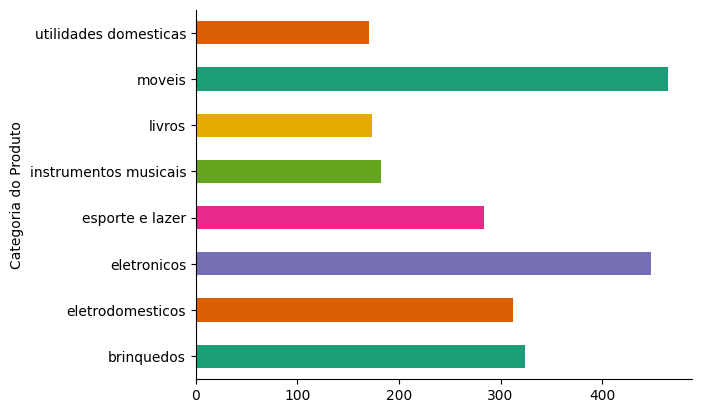

In [ ]:
# Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns
loja.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análise do faturamento


Loja 1 Revenue: 1534509.12
Loja 2 Revenue: 1488459.06
Loja 3 Revenue: 1464025.03
Loja 4 Revenue: 1384497.58


<ipython-input-43-fc7d8b48c4f2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Faturamento', data=revenue_df, palette="viridis")


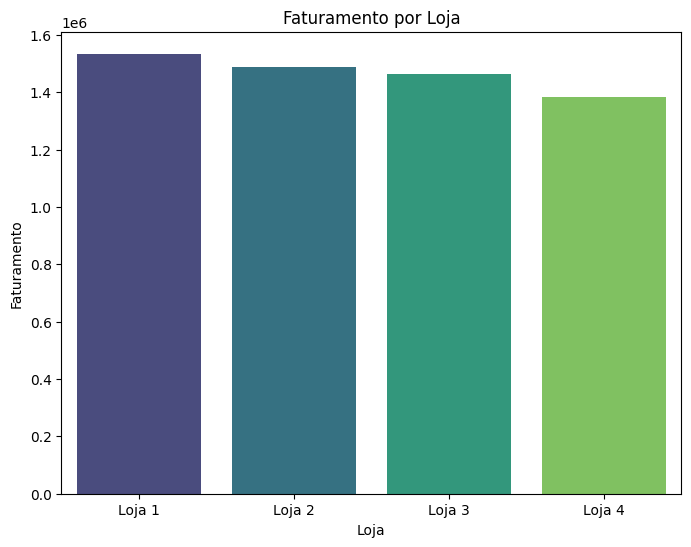

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the total revenue for each store
revenue_loja1 = loja['Preço'].sum()
revenue_loja2 = loja2['Preço'].sum()
revenue_loja3 = loja3['Preço'].sum()
revenue_loja4 = loja4['Preço'].sum()

# Print the revenue for each store
print(f"Loja 1 Revenue: {revenue_loja1}")
print(f"Loja 2 Revenue: {revenue_loja2}")
print(f"Loja 3 Revenue: {revenue_loja3}")
print(f"Loja 4 Revenue: {revenue_loja4}")

# Create a bar plot of the revenue for each store
revenue_data = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [revenue_loja1, revenue_loja2, revenue_loja3, revenue_loja4]
}
revenue_df = pd.DataFrame(revenue_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Loja', y='Faturamento', data=revenue_df, palette="viridis")
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.show()


# 2. Vendas por Categoria


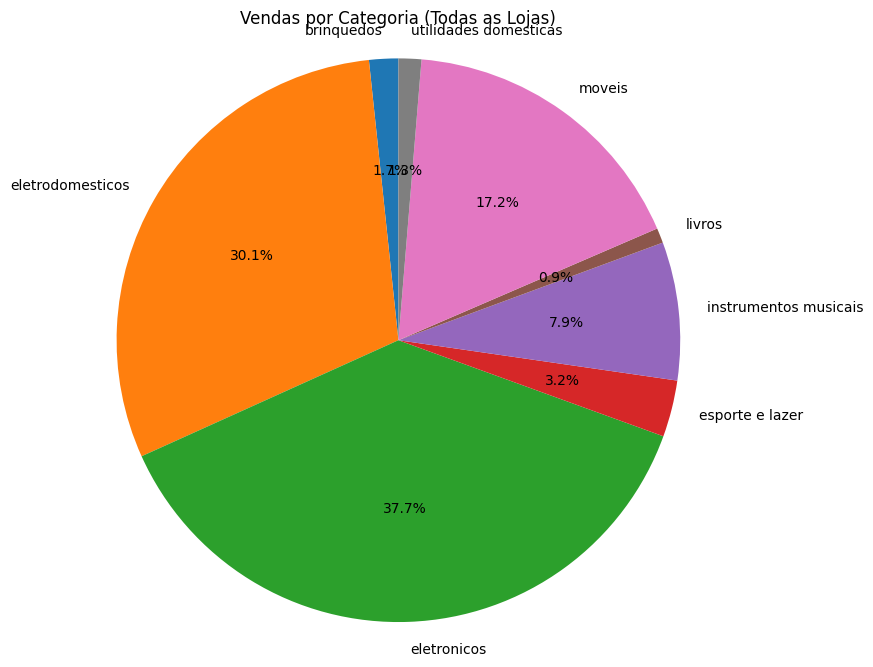

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Concatenate all store dataframes
all_stores = pd.concat([loja, loja2, loja3, loja4])

# Calculate total sales per category
sales_by_category = all_stores.groupby('Categoria do Produto')['Preço'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Vendas por Categoria (Todas as Lojas)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Calculate the average rating for each store
average_rating_loja1 = loja['Avaliação da compra'].mean()
average_rating_loja2 = loja2['Avaliação da compra'].mean()
average_rating_loja3 = loja3['Avaliação da compra'].mean()
average_rating_loja4 = loja4['Avaliação da compra'].mean()

# Print the average rating for each store
print(f"Loja 1 Avaliação Média: {average_rating_loja1}")
print(f"Loja 2 Avaliação Média: {average_rating_loja2}")
print(f"Loja 3 Avaliação Média: {average_rating_loja3}")
print(f"Loja 4 Avaliação Média: {average_rating_loja4}")

# Calculate the overall average rating across all stores
overall_average_rating = (average_rating_loja1 + average_rating_loja2 + average_rating_loja3 + average_rating_loja4) / 4

print(f"Avaliação Média Geral: {overall_average_rating}")

#Alternative using the concatenated dataframe
overall_average_rating_alt = all_stores['Avaliação da compra'].mean()
print(f"Avaliação Média Geral (Alternativa): {overall_average_rating_alt}")


Loja 1 Avaliação Média: 3.976685036032217
Loja 2 Avaliação Média: 4.037303942348453
Loja 3 Avaliação Média: 4.048325561678677
Loja 4 Avaliação Média: 3.9957591178965224
Avaliação Média Geral: 4.014518414488967
Avaliação Média Geral (Alternativa): 4.014520402755696


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd
# Concatenate all store dataframes
all_stores = pd.concat([loja, loja2, loja3, loja4])

# Count the occurrences of each product
product_counts = all_stores['Produto'].value_counts()

# Get the top N most repeated products (e.g., top 10)
top_products = product_counts.head(10)

print("Top 10 Produtos mais vendidos:")
top_products


Top 10 Produtos mais vendidos:


,count
Produto,
Cômoda,210
Carrinho controle remoto,206
Micro-ondas,206
Bateria,203
Cama king,201
Secadora de roupas,200
Modelagem preditiva,200
Jogo de panelas,200
Cama box,199


# 5. Frete Médio por Loja


<ipython-input-39-bf74fbff3596>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Frete Médio', data=freight_df, palette="viridis")


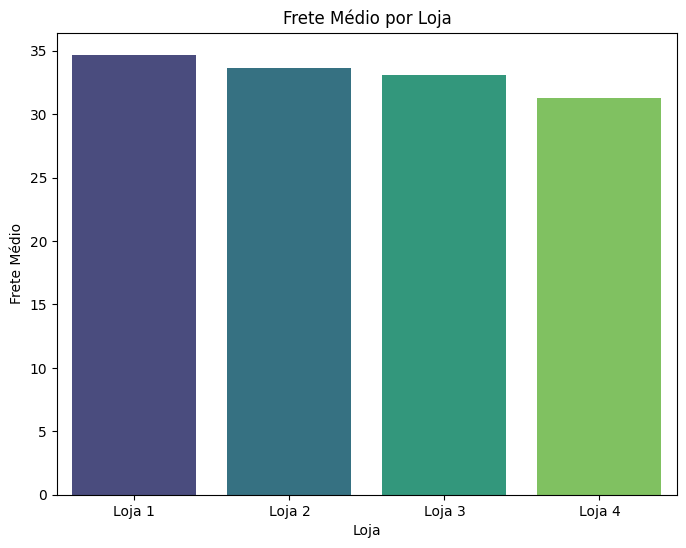

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average freight cost for each store
average_freight_loja1 = loja['Frete'].mean()
average_freight_loja2 = loja2['Frete'].mean()
average_freight_loja3 = loja3['Frete'].mean()
average_freight_loja4 = loja4['Frete'].mean()

# Create a bar plot of the average freight cost for each store
freight_data = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [average_freight_loja1, average_freight_loja2, average_freight_loja3, average_freight_loja4]
}
freight_df = pd.DataFrame(freight_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Loja', y='Frete Médio', data=freight_df, palette="viridis")
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.show()


Loja 1 Faturamento: 1534509.12
Loja 2 Faturamento: 1488459.06
Loja 3 Faturamento: 1464025.03
Loja 4 Faturamento: 1384497.58


<ipython-input-47-145e505525d3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Faturamento', data=revenue_df, palette="viridis")


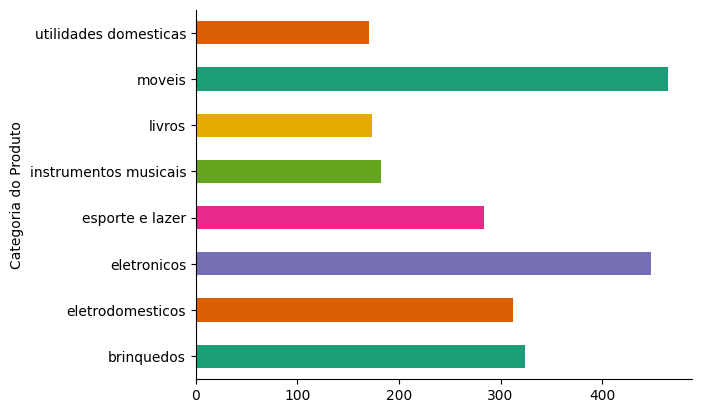

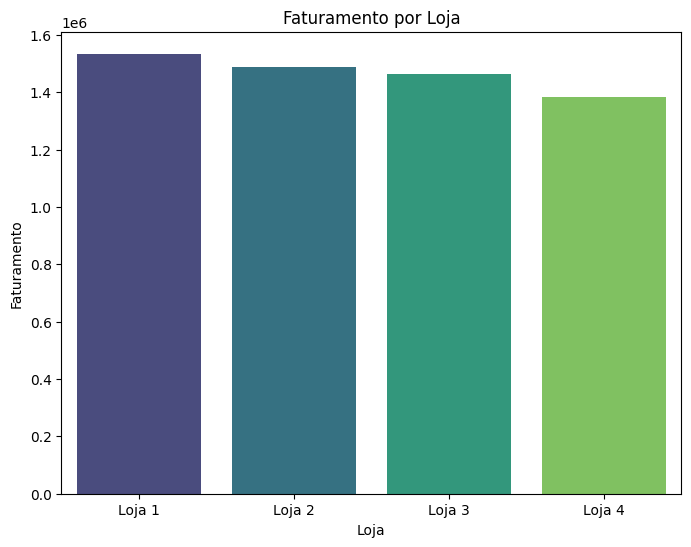

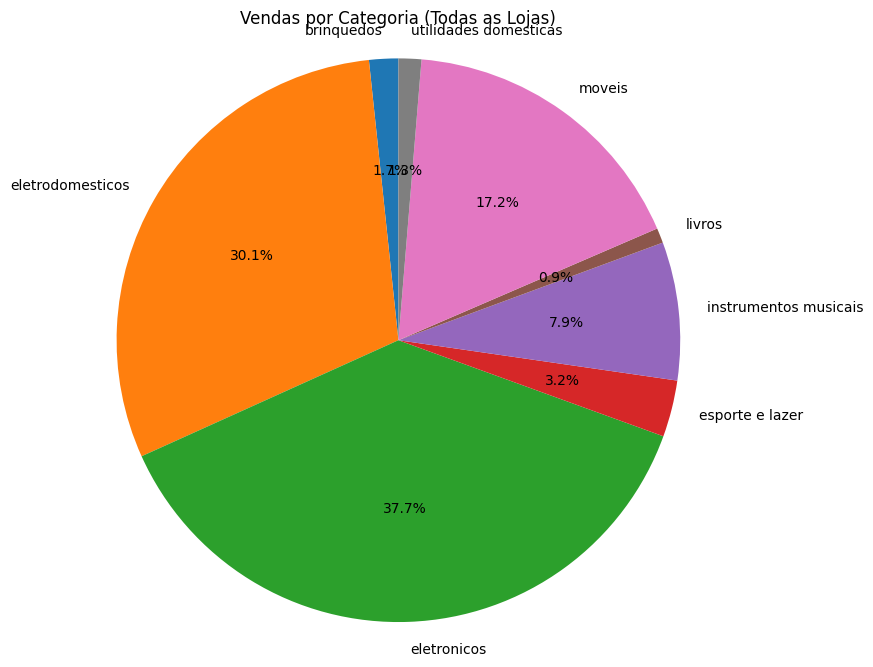

Loja 1 Avaliação Média: 3.976685036032217
Loja 2 Avaliação Média: 4.037303942348453
Loja 3 Avaliação Média: 4.048325561678677
Loja 4 Avaliação Média: 3.9957591178965224
Avaliação Média Geral: 4.014518414488967
Avaliação Média Geral (Alternativa): 4.014520402755696
Top 10 Produtos mais vendidos:


<ipython-input-47-145e505525d3>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Frete Médio', data=freight_df, palette="viridis")


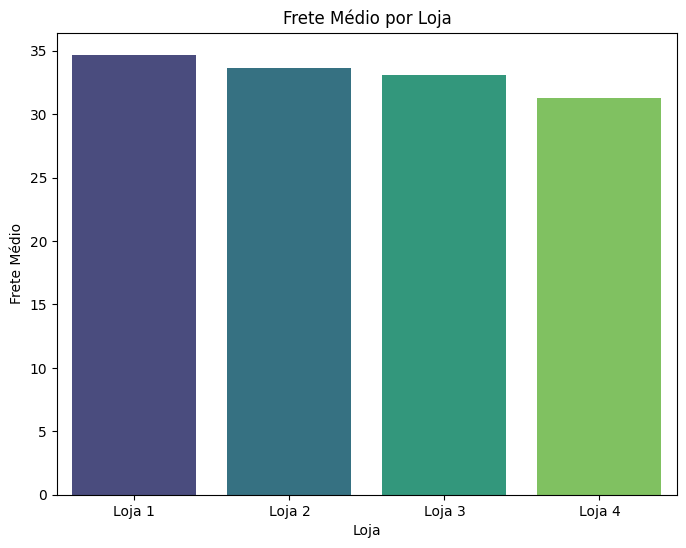

In [ ]:
# -*- coding: utf-8 -*-
"""AluraStoreBr.ipynb

### Importação dos dados
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

# Categoria do Produto

from matplotlib import pyplot as plt

loja.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

""" 1. Análise do faturamento """
# Soma os valores da coluna Preço de cada loja para estimar o faturamento.

# Calcula o faturamento para cada loja
revenue_loja1 = loja['Preço'].sum()
revenue_loja2 = loja2['Preço'].sum()
revenue_loja3 = loja3['Preço'].sum()
revenue_loja4 = loja4['Preço'].sum()

# Imprime o faturamento para cada loja
print(f"Loja 1 Faturamento: {revenue_loja1}")
print(f"Loja 2 Faturamento: {revenue_loja2}")
print(f"Loja 3 Faturamento: {revenue_loja3}")
print(f"Loja 4 Faturamento: {revenue_loja4}")

# Cria um gráfico de barras
revenue_data = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [revenue_loja1, revenue_loja2, revenue_loja3, revenue_loja4]
}
revenue_df = pd.DataFrame(revenue_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Loja', y='Faturamento', data=revenue_df, palette="viridis")
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.show()

""" 2. Vendas por Categoria """
# Calcula as vendas por Categoria de Produto.
all_stores = pd.concat([loja, loja2, loja3, loja4])

# Calcula as vendas por categoria
sales_by_category = all_stores.groupby('Categoria do Produto')['Preço'].sum()

# Cria um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Vendas por Categoria (Todas as Lojas)')
plt.axis('equal')
plt.show()

""" 3. Média de Avaliação das Lojas """
# Faz a média de avaliação da compra de todas as lojas.

# Calcula a média por cada loja
average_rating_loja1 = loja['Avaliação da compra'].mean()
average_rating_loja2 = loja2['Avaliação da compra'].mean()
average_rating_loja3 = loja3['Avaliação da compra'].mean()
average_rating_loja4 = loja4['Avaliação da compra'].mean()

# Imprime a média
print(f"Loja 1 Avaliação Média: {average_rating_loja1}")
print(f"Loja 2 Avaliação Média: {average_rating_loja2}")
print(f"Loja 3 Avaliação Média: {average_rating_loja3}")
print(f"Loja 4 Avaliação Média: {average_rating_loja4}")

# Calcula a avalialçao geral de todas as lojas
overall_average_rating = (average_rating_loja1 + average_rating_loja2 + average_rating_loja3 + average_rating_loja4) / 4

print(f"Avaliação Média Geral: {overall_average_rating}")

overall_average_rating_alt = all_stores['Avaliação da compra'].mean()
print(f"Avaliação Média Geral (Alternativa): {overall_average_rating_alt}")

""" 4. Produtos Mais e Menos Vendidos """
# Mostra quais foram os produtos mais e menos vendidos
all_stores = pd.concat([loja, loja2, loja3, loja4])

# Conta a ocorrência de cada produto
product_counts = all_stores['Produto'].value_counts()

# Seleciona os 10 produtos mais vendidos
top_products = product_counts.head(10)

print("Top 10 Produtos mais vendidos:")
top_products

""" 5. Frete Médio por Loja """
# Calcula o valor médio dos fretes por loja, e gera um gráfico de barras.

# Calcula o preço médio do frete para cada loja.
average_freight_loja1 = loja['Frete'].mean()
average_freight_loja2 = loja2['Frete'].mean()
average_freight_loja3 = loja3['Frete'].mean()
average_freight_loja4 = loja4['Frete'].mean()

# Cria um gráfico de barras com o custo médio do frete para cada loja.
freight_data = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [average_freight_loja1, average_freight_loja2, average_freight_loja3, average_freight_loja4]
}
freight_df = pd.DataFrame(freight_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Loja', y='Frete Médio', data=freight_df, palette="viridis")
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.show()